# ECG classification

Laurent Cetinsoy - Datadidacte


In [1]:
from IPython.display import HTML

## A first naive model by extracting simple features


Your environment contains variables arr, nsr, and chf which respectively contain 10-second recordings of ECG signals extracted from three datasets on PhysioNet: one from a person suffering from arrhythmia, one from a person with a normal heart rhythm, and another from a person with heart failure.


Matplotlib  subplots (or any other library), display these signals on three subfigures (the subplots should be called with the parameter nrows = 3).
Can you find any differences between them?

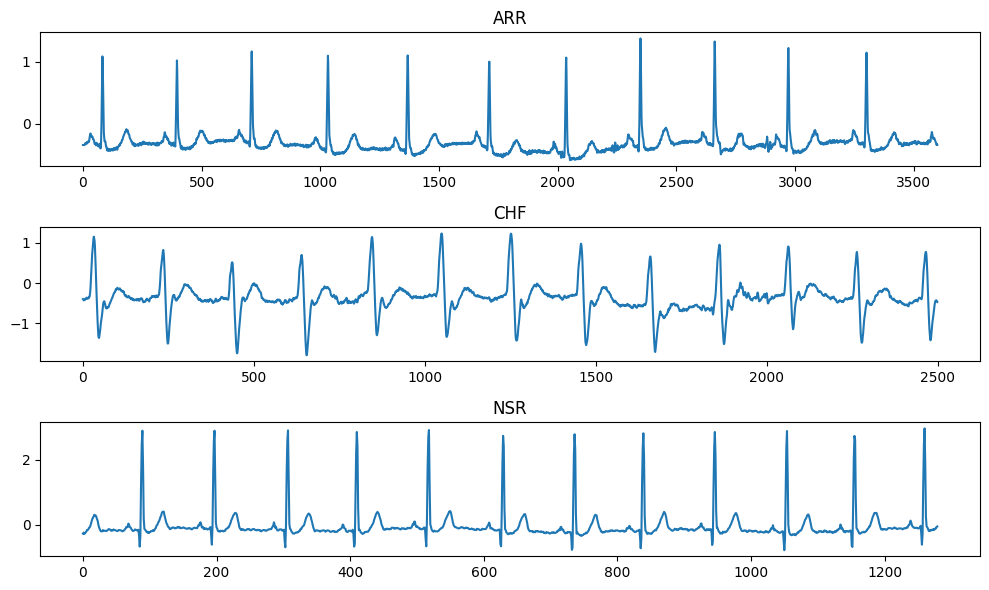

In [20]:
import numpy as np

arr = np.loadtxt('datasets/arr.txt')
chf = np.loadtxt('datasets/chf.txt')
nsr = np.loadtxt('datasets/nsr.txt')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(arr)
plt.title('ARR')
plt.subplot(3, 1, 2)
plt.plot(chf)
plt.title('CHF')
plt.subplot(3, 1, 3)
plt.plot(nsr)
plt.title('NSR')
plt.tight_layout()
plt.show()


We want to extract features from the time series. For that we will use simple statistics.


Create a function named calculate_stats_features(x) that calculates some statistical features of a signal x using standard numpy functions: nanpercentile, nanmean, etc.
calculate_stats_features will return a list of features in this order:

0. Max
1. Min
2. Mean
3. Median
4. Variance

In [21]:
def max_signal(signal):
    return np.max(signal)

def min_signal(signal):
    return np.min(signal)

def mean_signal(signal):
    return np.mean(signal)

def median_signal(signal):
    return np.median(signal)

def var_signal(signal):
    return np.var(signal)

def calculate_stats_features(signal):
    return max_signal(signal), min_signal(signal), mean_signal(signal), median_signal(signal), var_signal(signal)

def print_stats_features(signal):
    max_val, min_val, mean_val, median_val, std_val = calculate_stats_features(signal)
    print('Max:', max_val)
    print('Min:', min_val)
    print('Mean:', mean_val)
    print('Median:', median_val)
    print('Standard deviation:', std_val)
    
print('ARR')
print_stats_features(arr)
print()

print('CHF')
print_stats_features(chf)
print()

print('NSR')
print_stats_features(nsr)
print()

ARR
Max: 1.375
Min: -0.59
Mean: -0.3120111111111112
Median: -0.335
Standard deviation: 0.039663552654320984

CHF
Max: 1.235
Min: -1.79
Mean: -0.363622
Median: -0.375
Standard deviation: 0.15541165111599997

NSR
Max: 2.965
Min: -0.785
Mean: -0.035453124999999995
Median: -0.145
Standard deviation: 0.21755463842773434





Create a function named `calculate_zero_crossing(x)` that calculates the Zero
Crossing of a signal x.

The zero crossing is defined as the number of times the signal changes sign.
For this, you can use the signbit, diff, and nonzero functions from numpy.


In [22]:
def calculate_zero_crossing(x):
    return np.sum(x[:-1] * x[1:] < 0)

Create a function named **calculate_rms(x)** that returns the Root Mean Square (RMS) of a signal x. We will use the nanmean function instead of the mean function from numpy.

In [23]:
def calculate_rms(x):
    return np.sqrt(np.nanmean(x**2))

calculate_rms(arr)

0.37015467862923346

Create a function named calculate_entropy(x) that calculates the Shannon entropy of a signal x using the entropy function from scipy.stats.

In [24]:
from scipy.stats import entropy
def calculate_entropy(x):
    return entropy(np.histogram(x, bins=100)[0])

calculate_entropy(arr)

3.116446795364062

Create a function get_features(x) that combines the features calculated by all previous functions including caculate_stats_features.

In [25]:
def get_features(x):
    return list(calculate_stats_features(x)) + [calculate_zero_crossing(x), calculate_rms(x), calculate_entropy(x)]

get_features(arr)

[1.375,
 -0.59,
 -0.3120111111111112,
 -0.335,
 0.039663552654320984,
 21,
 0.37015467862923346,
 3.116446795364062]

Load the small ecg dataset
Use your fonction get_features create a new dataframe where you have all the feature as X and y as the label.
Train a random forest on it after doing a train test split if the dataset is not too small

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
ecg_df = pd.read_csv('datasets/ecg_small_dataset.csv')
ecg_df = ecg_df.drop(ecg_df.columns[0], axis=1)
ecg_df.head()

,1,2,3,4,5,6,7,8,9,10,...,15352,15353,15354,15355,15356,15357,15358,15359,15360,15361
0,1,-0.429539,-0.431368,-0.427633,-0.453029,-0.460659,-0.448497,-0.469340,-0.475054,-0.473138,...,-0.299412,-0.341126,-0.364847,-0.360565,-0.358913,-0.406275,-0.452011,-0.440424,-0.417412,-0.419938
1,1,-0.527040,-0.542357,-0.539678,-0.541406,-0.518841,-0.505650,-0.523337,-0.532713,-0.520244,...,-0.523533,-0.542245,-0.544550,-0.523466,-0.510608,-0.497607,-0.508469,-0.495939,-0.479749,-0.484566
2,2,-0.410425,-0.416644,-0.424048,-0.398195,-0.393680,-0.386315,-0.371686,-0.377065,-0.368017,...,-0.288222,-0.742357,-1.088831,-1.347331,-1.349561,-1.165759,-1.004126,-0.829844,-0.671777,-0.536377
3,2,-0.007009,-0.069041,-0.063572,-0.080944,-0.070556,-0.098701,-0.090165,-0.108852,-0.074475,...,-1.906522,-1.694052,-1.534222,-1.338660,-1.167661,-0.989236,-0.777201,-0.544748,-0.313120,-0.032588
4,0,-0.325000,-0.395000,-0.255000,-0.335000,-0.375000,-0.335000,-0.285000,-0.275000,-0.245000,...,-0.085000,-0.105000,-0.135000,-0.135000,-0.155000,-0.155000,-0.135000,-0.145000,-0.125000,-0.115000


In [28]:
def load_data(df):
    X = np.array(df.iloc[:, 1:].apply(get_features, axis=1).values.tolist())
    y = np.array(df.iloc[:, 0].values)
    return X, y

X, y = load_data(ecg_df)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.0

Now you have a first pipeline, do the same on the full dataset
Report the train and test loss

In [31]:
big_ecg_df = pd.read_csv('datasets/ECG-laurent.csv')
big_ecg_df = big_ecg_df.drop(big_ecg_df.columns[0], axis=1)
big_ecg_df.head()

/var/folders/nm/xmbyqkhd1wjg9j848np2w3gr0000gn/T/ipykernel_75876/105567252.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  big_ecg_df = pd.read_csv('datasets/ECG-laurent.csv')


,1,2,3,4,5,6,7,8,9,10,...,65528,65529,65530,65531,65532,65533,65534,65535,65536,65537
0,1,-0.060085,0.001638,-0.014941,-0.018776,-0.110048,-0.160348,-0.196445,-0.287140,-0.383509,...,-0.145316,-0.088612,0.001568,0.066026,0.154291,0.214976,0.227396,0.172451,0.011588,-0.154281
1,1,-0.467585,-0.650931,-0.595663,-0.627657,-0.552164,-0.532318,-0.500500,-0.486974,-0.480109,...,0.273010,0.279927,0.213876,0.137012,0.019218,-0.031818,-0.068809,-0.068333,-0.178109,-0.136239
2,1,-0.155555,-0.229827,-0.207653,-0.210114,-0.191253,-0.184057,-0.152477,-0.171106,-0.159727,...,-1.238173,-1.112138,-0.812259,-0.595419,-0.444057,-0.326833,-0.117486,-0.038309,-0.015658,0.004507
3,1,0.099644,0.098019,0.089555,0.108130,0.070369,0.083866,0.073525,0.061310,0.081658,...,-0.291689,-0.111845,0.180895,0.373213,0.486517,0.394578,0.283331,0.169355,0.166666,0.146715
4,1,-0.368856,-0.530640,-0.487672,-0.447722,-0.276366,-0.292531,-0.236326,-0.209993,-0.174277,...,-0.546984,-0.427314,-0.527221,-0.588838,-0.624649,-0.577075,-0.652600,-0.500391,-0.386848,-0.161838


In [32]:
X, y = load_data(big_ecg_df)

In [33]:
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.79      1.00      0.88        19
           2       1.00      0.33      0.50         6

    accuracy                           0.85        33
   macro avg       0.93      0.74      0.77        33
weighted avg       0.88      0.85      0.83        33



try to tweak the model hyperparameter to see if it works

In [34]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)


search.fit(X_train, y_train)

search.best_params_


python(12408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12416) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12423) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/eithannakache

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [36]:
best_clf = search.best_estimator_
print(classification_report(y_test, best_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.83      1.00      0.90        19
           2       1.00      0.50      0.67         6

    accuracy                           0.88        33
   macro avg       0.94      0.79      0.83        33
weighted avg       0.90      0.88      0.87        33



## Fourier transform features

We want now to see if a model using only fourier transform could work.

create a function get_fourier_coefficients(ecg)

In [37]:
def get_fourier_features(ecg):
    fourier = np.fft.fft(ecg)
    return np.abs(fourier[:fourier.size // 2])

Using this function create a dataframe df_fourrier containing the fourrier transform coefficients and the label

In [38]:
df_fourier = pd.DataFrame(big_ecg_df.iloc[:, 1:].apply(get_fourier_features, axis=1).values.tolist())
df_fourier =  pd.concat([big_ecg_df.iloc[:, 0], df_fourier], axis=1)
df_fourier

,1,0,1,2,3,4,5,6,7,8,...,32758,32759,32760,32761,32762,32763,32764,32765,32766,32767
0,1,17599.976889,1850.171567,295.333800,1185.545859,926.385162,538.293366,828.133738,689.752202,1559.152560,...,1.099556,1.045791,0.235144,1.865392,1.570794,1.264249,1.287078,0.846852,1.615356,0.373965
1,1,14484.396444,4137.499334,2152.391165,2520.424900,2066.642615,1640.749953,1579.574817,945.659290,1648.125085,...,1.722051,2.652570,6.639854,0.622695,1.729210,2.705399,0.623744,0.574554,1.559272,0.884378
2,1,10683.818667,400.463461,481.532272,729.461562,964.923609,946.182174,618.667927,1231.230068,82.521093,...,8.287070,4.246531,2.753554,6.270798,4.136835,1.777825,1.008231,2.256532,3.618107,5.542327
3,1,3536.462222,313.204866,531.520312,667.082007,647.502832,600.576281,620.723292,409.162029,2237.361623,...,4.377541,1.592234,3.068360,1.958553,2.909697,3.388771,3.267543,2.945765,2.518522,2.006570
4,1,9756.496000,303.329945,596.020424,609.179346,380.981983,272.183845,1134.805832,111.595226,865.347508,...,7.524246,7.355356,2.491244,8.254273,9.044668,6.631883,5.825186,6.519294,8.791134,11.619491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2,14269.954560,593.412836,760.985169,1294.411838,1341.284484,913.092712,421.080003,1230.467798,495.875861,...,0.897350,1.927539,0.518119,0.248199,2.120751,1.818941,2.064936,2.810718,2.494118,2.860149
158,2,17730.076160,378.721372,408.463206,581.751509,276.486875,177.656101,818.958481,415.362422,791.562387,...,3.115961,3.087415,0.922637,1.543277,3.281298,1.411815,0.522622,1.670959,1.728851,1.948227
159,2,11277.319680,1434.196761,2603.621630,769.678837,1109.373133,479.235405,778.097122,1163.406930,628.928545,...,2.787532,0.483426,1.611714,1.507179,0.769242,0.925464,2.203433,1.064754,1.467670,2.721503
160,2,22526.704640,289.587563,621.209385,322.026792,332.194610,843.567029,683.896537,939.492166,1015.935540,...,6.233339,7.491898,3.492366,5.710833,7.020063,5.326488,15.122163,7.707624,0.629684,11.191931


Try to train a model using the Fourrier coefficient

In [39]:
X = np.array(df_fourier.iloc[:, 1:].values.tolist())
y = np.array(df_fourier.iloc[:, 0].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_clf = search.best_estimator_

best_clf.fit(X_train, y_train)

print(classification_report(y_test, best_clf.predict(X_test)))

/Users/eithannakache/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.73      1.00      0.84        19
           2       1.00      0.33      0.50         6

    accuracy                           0.79        33
   macro avg       0.91      0.65      0.70        33
weighted avg       0.84      0.79      0.76        33



Try to learn a model using both fourrier coefficient and the features from the previous sections. Does it work ?

In [40]:
df_fusion = pd.concat([df_fourier, big_ecg_df.iloc[:, 1:]], axis=1)

X = np.array(df_fusion.iloc[:, 1:].values.tolist())
y = np.array(df_fusion.iloc[:, 0].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_clf = search.best_estimator_

best_clf.fit(X_train, y_train)

print(classification_report(y_test, best_clf.predict(X_test)))

/Users/eithannakache/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.79      1.00      0.88        19
           2       1.00      0.50      0.67         6

    accuracy                           0.85        33
   macro avg       0.93      0.75      0.80        33
weighted avg       0.88      0.85      0.84        33



## Wavelets

We now wants to use another signal decomposition which are called wavelet. Wavelet are a multi-scale function decomposition on a familly of functions generated from what is called a mother wavelet.

Using PyWavelet make a function get_wavelet_coefficients(ecg) that returns the wavelet coefficient of a given ECG


Using the get_wavelet_coefficients, create a dataframe when the features are the coefficients and include the label

In [41]:
# We now wants to use another signal decomposition which are called wavelet. Wavelet are a multi-scale function decomposition on a familly of functions generated from what is called a mother wavelet.

# Using PyWavelet make a function get_wavelet_coefficients(ecg) that returns the wavelet coefficient of a given ECG

# Using the get_wavelet_coefficients, create a dataframe when the features are the coefficients and include the label


import pywt

def get_wavelet_coefficients(ecg):
    return pywt.wavedec(ecg, 'db1', level=5)

df_wavelet = pd.DataFrame(big_ecg_df.iloc[:, 1:].apply(get_wavelet_coefficients, axis=1).values.tolist())
df_wavelet =  pd.concat([big_ecg_df.iloc[:, 0], df_wavelet], axis=1)
df_wavelet

,1,0,1,2,3,4,5
0,1,"[-1.7247640828139246, -2.3856386431824195, -0....","[0.4608333969217315, 0.42717655914093483, -0.1...","[0.47066104905616746, 0.3923591443290158, 2.15...","[0.23398777043846805, -0.13988836422140064, 0....","[-0.012365192056926703, 0.10659438184250758, -...","[-0.043644283112328146, 0.0027120905209183904,..."
1,1,"[-3.263212590663915, -4.653170426500246, -4.60...","[0.6767262590048325, -2.6809655468101914, 2.60...","[-0.3779746312409586, 0.27979786378672317, -2....","[-0.09541755157059814, -0.06335760659606528, 0...","[0.05240207529741027, -0.04850345713188483, -0...","[0.1296451356522238, 0.022623205161325842, -0...."
2,1,"[-0.4978939659836613, -0.9118196633179099, 0.6...","[-0.3480287969457418, -0.560696686457608, 0.02...","[-0.15286285963551016, 1.0779281416175888, -0....","[-0.03686006505053425, -0.19458225427089942, 1...","[0.016192546768743096, -0.02586348352945142, 0...","[0.05251776412603514, 0.0017400933566928186, -..."
3,1,"[2.205235441910114, 0.5856750104729328, 2.9158...","[-2.165481423035172, -0.4292397173888995, -0.5...","[0.31409885065233195, 0.4960012699731312, 0.00...","[0.03757475241075476, 0.3279701015097548, -0.4...","[-1.0857062746554754e-05, 0.009700279141923748...","[0.0011493717321513432, -0.013134410696681764,..."
4,1,"[-0.4746272032663866, -1.1305669387863821, -1....","[-0.8110981183885357, -0.3735166690680439, 0.9...","[-0.5159078995479206, 0.5019279819477755, -0.1...","[-0.28979898703922496, -0.14998238331965028, -...","[0.017948880231474656, -0.06128862718033136, -...","[0.11439833939134371, -0.02824934214676009, 0...."
...,...,...,...,...,...,...,...
157,2,"[-1.0743222921961733, 0.3309999830708758, -1.3...","[-2.0715877273301855, 0.2968613567693387, -1.0...","[-0.23210264212158718, -0.2333088139483309, 0....","[1.5533735789464034, -0.785639406007082, -0.19...","[0.31065963863502255, 0.2632017202266885, -0.4...","[-0.021884146609641716, 0.3107187974041443, 0...."
158,2,"[-1.9145585634754703, -1.8152851839538358, -1....","[-0.07836436476386956, -0.02511681178478341, -...","[-0.12804295026715143, 0.003618461978500707, 0...","[0.004394496991630931, -0.022085468189381757, ...","[0.041150879626285976, -0.03432765702456198, -...","[0.05961703603273334, 0.009068433381752285, -0..."
159,2,"[-0.774997847937043, -0.9461507342082323, -1.4...","[0.04245344054433344, 0.07334211787880625, 0.0...","[0.10865777047650835, -0.029488452713926062, 0...","[0.04222170912703293, 0.010489351585636587, -0...","[-0.011722394481821512, 0.04399927995182376, 0...","[-0.03408363968003877, 0.01244026408383884, -0..."
160,2,"[-1.6829284641172948, -2.6035903261783484, -1....","[-0.16580706004723264, -1.3646760887011702, 1....","[1.3457632471193983, -0.29132916234189277, -0....","[0.7724643199942575, 0.005064493732383008, -0....","[0.03119868794274314, 0.3324400585791493, 0.01...","[-0.1509680664657741, 0.06837049827938194, 0.1..."


Train a random forest classifier with such features. DOes the model work

In [48]:
df_wavelet.iloc[:, 1:] = df_wavelet.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
X = np.array(df_wavelet.iloc[:, 1:].values.tolist())
y = np.array(df_wavelet.iloc[:, 0].values)

X = np.nan_to_num(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.58      1.00      0.73        19
           2       0.00      0.00      0.00         6

    accuracy                           0.58        33
   macro avg       0.19      0.33      0.24        33
weighted avg       0.33      0.58      0.42        33



/Users/eithannakache/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eithannakache/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eithannakache/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Add one or several of the previous feature functions and try to train another model

In [50]:
df_wavelet = pd.concat([df_wavelet, df_fourier], axis=1)

X = np.array(df_wavelet.iloc[:, 1:].values.tolist())
y = np.array(df_wavelet.iloc[:, 0].values)

X = np.nan_to_num(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.76      1.00      0.86        19
           2       1.00      0.33      0.50         6

    accuracy                           0.82        33
   macro avg       0.92      0.69      0.74        33
weighted avg       0.86      0.82      0.80        33



Specify the methodology you used to train the model and report the various attempts results into a table

## Deep learning (1D CNN)

Now we want to see if we can skip all theses feature engineering techniques !
Design and train a multi-layer one dimensional CNN using the raw ECG signal as features.


Could you reach or surpass the feature based models ?

In [ ]:
# Now we want to see if we can skip all theses feature engineering techniques !
# Design and train a multi-layer one dimensional CNN using the raw ECG signal as features.


# Could you reach or surpass the feature based models ?


from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical

X = np.array(big_ecg_df.iloc[:, 1:].values.tolist())
y = np.array(big_ecg_df.iloc[:, 0].values)

X = np.nan_to_num(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = to_categorical(y_train)

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred = model.predict_classes(X_test)

print(classification_report(y_test, y_pred))

/Users/eithannakache/.pyenv/versions/3.9.7/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
